# Graph Coloring Problem with QUBO

## Problem setup

In [1]:
# Useful packages
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
os.environ["WORLD_SIZE"] = "1"

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import argparse

from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import SPSA
from qiskit.primitives import Sampler
from qiskit_algorithms import SamplingVQE

In [2]:
# Graphs definition

def test_selector(id):

  if (id == 1):
    N=3; K=2
    G=np.zeros([N,N])
    G[0][1]=1
    G[1][0]=1; G[1][2]=1
    G[2][1]=1

  elif (id == 2):
    N=5; K=3
    G=np.zeros([N,N])
    G[0][1]=1; G[0][4]=1
    G[1][0]=1; G[1][2]=1; G[1][3]=1; G[1][4]=1
    G[2][1]=1; G[2][3]=1
    G[3][1]=1; G[3][2]=1; G[3][4]=1
    G[4][0]=1; G[4][1]=1; G[4][3]=1

  elif (id == 3):
    N=4; K=2
    G=np.zeros([N,N])
    G[0][1]=1
    G[1][0]=1; G[1][2]=1; G[1][3]=1
    G[2][1]=1;
    G[3][1]=1

  elif (id == 4):
    N=6; K=3
    G=np.zeros([N,N])
    G[0][2]=1
    G[1][3]=1; G[1][4]=1
    G[2][0]=1; G[2][4]=1
    G[3][1]=1; G[3][4]=1; G[3][5]=1
    G[4][1]=1; G[4][2]=1; G[4][3]=1
    G[5][3]=1

  elif (id == 5):
    N=6; K=3
    G=np.zeros([N,N])
    G[0][1]=1; G[0][5]=1
    G[1][0]=1; G[1][2]=1; G[1][3]=1; G[1][5]=1
    G[2][1]=1; G[2][3]=1
    G[3][1]=1; G[3][2]=1; G[3][4]=1
    G[4][3]=1; G[4][5]=1
    G[5][0]=1; G[5][1]=1; G[5][4]=1


  return G, N, K

In [3]:
# useful functions

def draw_graph(G, color_list):
  print()
  if len(color_list) == 0:
    nx.draw_circular(G, with_labels=True, font_weight='bold')
  else:
    nx.draw_circular(G, with_labels=True, font_weight='bold', node_color=color_list)
  plt.show()

def getColors(solution,N,K):
  colors = np.empty(N)
  for ii in range(len(solution)):
    if solution[ii] == 1:
      inode = (ii//K)
      icolor = (ii%K)
      colors[inode] = icolor
  return colors

------ INPUT -------
N:  3
K:  2
G:
 [[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]



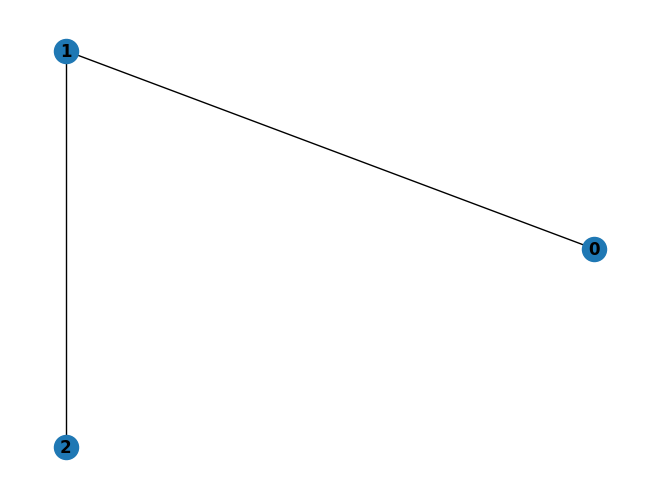

In [4]:
# select a graph from ID (N: number of node, K: number of color, G: adjacency matrix)
testid = 1

G, N, K = test_selector(testid)
print("------ INPUT -------")
print("N: ", N)
print("K: ", K)
print("G:\n", G)
draw_graph(nx.from_numpy_array(G), [])

### Formulating QUBO

#### Write your code in the cell below
* Step 1: initialize $Q$, $g$ and $c$ with the right dimensions, filling them with $0$s
  * Hint: $Q$ and $g$ could be a numpy array
* Step 2: add penalties from nodes constraints (each node is colored with just one color)
  * Hint: loop over nodes and colors and
      * add the linear terms $-1$ at $g$
      * add the quadratic terms $2 * x_{i,k} *x_{i+1,k}$ at $Q$ (remember that Q is symmetrical)
      * increase the constant $c$ by 1
* Step 3: add penalities from edge constraints (two connected nodes have different colors)
  * Hint: loop over the edges
* Step 4: multiply Q, g, c for the penality $p=4$
* Step 5: solving by brute force finding $y$ that minimize $C(y) = {\bf y}^TQ{\bf y} + {\bf g}^T{\bf y} + c$
  * Hint:
    * initialize Ymin, Cmin
    * build the list Ylist with all the possible results (all the numbers from 0 to 2(N*K)-1 expressed in base 2, use itertools library)
    * Compute $C(y) = {\bf y}^TQ{\bf y} + {\bf g}^T{\bf y} + c$ for every element Y of Ylist and save the result if it is the best found result
* Step 6: print the result
  * Hint: use the draw_graph function

In [ ]:
# Step1
dim = N*K
Q = np.zeros((dim, dim))
g = np.zeros(dim)
c = 0

# Step 2
for ii in range(N): #loop over nodes
  for kk in range(K): #loop over colors
  ...

  for kk in range(K-1):
    for kkk in range(kk+1,K):
  ...

# Step 3
for ii in range(N):
  for jj in range(ii+1,N):
    if G[ii][jj] == 1:
      for kk in range(K):
        ...

# Step 4
...

# Step 5
...
for ii in range(len(Ylist)):
  ...

# Step 6
...
draw_graph(nx.from_numpy_array(G), getColors(Ymin, N, K))

Q:
 [[0. 4. 2. 0. 0. 0.]
 [4. 0. 0. 2. 0. 0.]
 [2. 0. 0. 4. 2. 0.]
 [0. 2. 4. 0. 0. 2.]
 [0. 0. 2. 0. 0. 4.]
 [0. 0. 0. 2. 4. 0.]]

g:  [-4. -4. -4. -4. -4. -4.]

c:  12 

computing: C(Y) = YQY + gY + c
    C(Y) min:  0.0
    Y min:  [0 1 1 0 0 1]

Graph coloring solution with QUBO:
y_01 = x_01 = true --> N0 C1
y_02 = x_10 = true --> N1 C0
y_05 = x_21 = true --> N2 C1




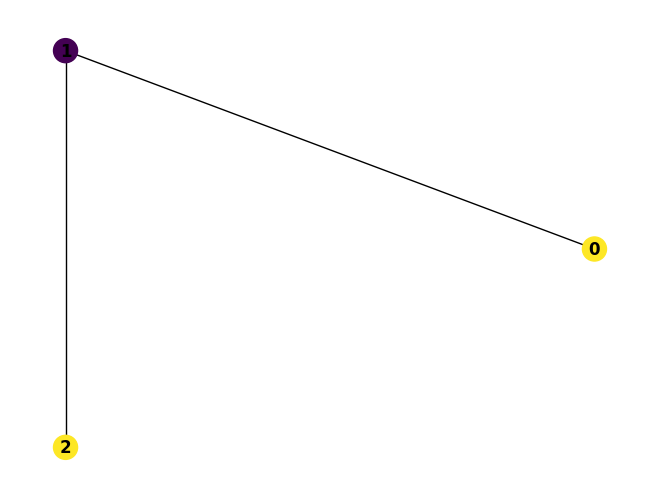

In [5]:
# Step 1
# Iniatilize Q assuming the mapping
# (i,k) --> (i*K+k), i index of node, k index of color
Q = np.zeros([N*K, N*K])
g = np.zeros(N*K)
c = 0

# Step 2
# add penalties from nodes constraints: a node is colored with one color
for ii in range(N):
  # add linear terms
  for kk in range(K):
    tt = ii*K+kk
    g[tt] = -1
  # add quadratic terms 2*x_{ii,kk}*x_{ii+1,kk}
  for kk in range(K-1):
    for kkk in range(kk+1,K):
      tt = ii*K+kk
      rr = ii*K+kkk
      Q[tt][rr] += 1
      Q[rr][tt] += 1
      # print("kk: ", kk, "ii: ", ii, "kkk: ", kkk, "tt: ", tt, "rr: ",rr)
  # add constant
  c += 1
# print("Q:\n", Q)

# Step 3
# add penalties from edges constraints: two connected nodes i and j have
# different colors
for ii in range(N):
  for jj in range(ii+1,N):
    if G[ii][jj] == 1:
      for kk in range(K):
        tt = ii*K+kk # i-index
        rr = jj*K+kk # j-index
        Q[tt][rr] += 0.5
        Q[rr][tt] += 0.5
        # print("ii: ", ii, "jj: ", jj, "kk: ", kk, "tt: ", tt, "rr: ", rr)
# print("Q:\n", Q)

# Step 4
penality = 4
Q = penality*Q
g = penality*g
c = penality*c
print("Q:\n", Q)
print("\ng: ", g)
print("\nc: ", c, "\n")

# Step 5
# Solving QUBO: finding Y that minimizes C(Y) = YQY + gY + c
Cmin = float('inf')

# building cross-product (0,1)^(N*K)
# all the numbers from 0 to 2(N*K)-1 expressed in base 2
Ylist = list(itertools.product([0, 1], repeat=(N*K)))
# print("Ylist - size: ", len(Ylist), "\n", Ylist)

# compute C(Y) = YQY + gY + c for every Y
for ii in range(len(Ylist)):
  Y = np.array(Ylist[ii])
  Cy=(Y.dot(Q).dot(Y.transpose()))+g.dot(Y.transpose())+c
  if ( Cy < Cmin ):
    Cmin = Cy
    Ymin = Y.copy()

# Step 6
# Print the result
print("computing: C(Y) = YQY + gY + c")
print("    C(Y) min: ", Cmin)
print("    Y min: ", Ymin)
print("\nGraph coloring solution with QUBO:")
for ii in range(len(Ymin)):
  if Ymin[ii] == 1:
    print("y_%02d = x_%d%d = true --> N%d C%d" % (ii, (ii//K), (ii%K), (ii//K), (ii%K)))
print()
draw_graph(nx.from_numpy_array(G), getColors(Ymin, N, K))

### Translating into Ising problem

#### Write your code in the cell below
* Step 7: initialize $ONES$, $ONEST$ and $QT$ with the right dimensions
* Step 8: compte $Qz$, $gzT$ and $cz$
* Step 9: solving Ising by brute force findin Z that minimizes $ E(Z) = ZT*Qz*Z + gzT * Z + cz$
* Step 10: convert Zmin to Ymin and call the variable Yzmin
* Step 11: verify that Yzmin is a solution for the original QUBO problem

In [ ]:
# Step 7
...

# Step 8
...

# Step 9
...

# Step 10
...

# Step 11
...
draw_graph(nx.from_numpy_array(G), getColors(Yzmin, N, K))

Qz:
 [[0.  1.  0.5 0.  0.  0. ]
 [1.  0.  0.  0.5 0.  0. ]
 [0.5 0.  0.  1.  0.5 0. ]
 [0.  0.5 1.  0.  0.  0.5]
 [0.  0.  0.5 0.  0.  1. ]
 [0.  0.  0.  0.5 1.  0. ]]

gzT:  [-1. -1. -2. -2. -1. -1.]

cz:  10.0 

computing: E(Z) = ZT*Qz*Z + gzT * Z + cz
    E(Z) min:  0.0
    Z min:  [ 1 -1 -1  1  1 -1]
    convert Z min to Y min:  [0. 1. 1. 0. 0. 1.]
    Yz min:  0.0

Graph coloring solution with Ising:
y_01 --> x_01=true --> N0 C1
y_02 --> x_10=true --> N1 C0
y_05 --> x_21=true --> N2 C1




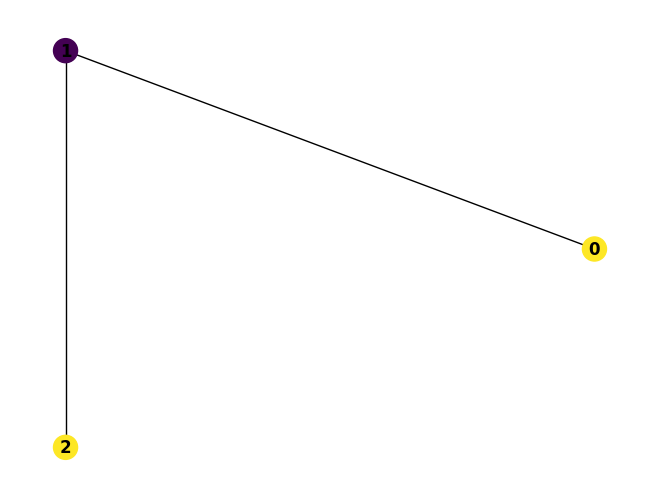

In [6]:
# Step 7
ONES = np.ones(N*K)
ONEST = ONES.transpose()
QT = Q.transpose()

# Step 8
Qz  =  0.25*Q
gzT = -0.25*(ONES.dot(QT+Q)) - 0.5*g
cz  =  0.25*(ONES.dot(Q.dot(ONEST))) + 0.5*g.dot(ONEST) + c
print("Qz:\n", Qz)
print("\ngzT: ", gzT)
print("\ncz: ", cz, "\n")

# Step 9
# Solving Ising: finding Z that minimizes E(Z) = ZT*Qz*Z + gzT * Z + cz
Ezmin = float('inf')

# building cross-product (0,1)^(N*K)
Zlist = list(itertools.product([1, -1], repeat=(N*K)))

# compute E(Z) = ZT*Qz*Z + gzT * Z + cz for every Z
for ii in range(len(Zlist)):
  Z = np.array(Zlist[ii])
  ZT= Z.transpose()
  Ez = (Z.dot(Qz)).dot(ZT) + gzT.dot(ZT) + cz
  if ( Ez < Ezmin ):
    Ezmin = Ez
    Zmin = Z.copy()
# print("\nZmin: ", Zmin, "Ezmin: ", Ezmin, "cz: ", cz)

# Step 10
# convert Zmin to Ymin
Yzmin = np.zeros(N*K)
for ii in range(len(Zmin)):
  Yzmin[ii] = (1-Zmin[ii])//2

# Step 11
print("computing: E(Z) = ZT*Qz*Z + gzT * Z + cz")
print("    E(Z) min: ", Ezmin)
print("    Z min: ", Zmin)
print("    convert Z min to Y min: ", Yzmin)
print("    Yz min: ", (Yzmin.dot(Q).dot(Yzmin.transpose()))+g.dot(Yzmin.transpose())+c)

print("\nGraph coloring solution with Ising:")
for ii in range(len(Yzmin)):
  if Yzmin[ii] == 1:
    print("y_%02d --> x_%d%d=true --> N%d C%d" % (ii, (ii//K), (ii%K), (ii//K), (ii%K)))
print()
draw_graph(nx.from_numpy_array(G), getColors(Yzmin, N, K))

### Translating into Hamiltonian

#### Write your code in the cell below
* Step 12: initialize pauli_list and coeffs as two empty lists
* Step 13: compte coefficent and pauli string for each linear term
* Step 14: compte coefficent and pauli string for each quadratic term
* Step 15: Print the offset, the Ising Hamiltonian and how many qubits the system needs

In [ ]:
# Step 12
...

# Step 13
...

# Step 14
...

# Step 15
...

In [7]:
# Step 12
pauli_list = []
coeffs = []

# Step 13
for ii in range(N*K):
  if gzT[ii] != 0:
    vp = np.zeros(N*K)
    wp = np.zeros(N*K)
    vp[ii] = 1
    pauli_list.append(Pauli((vp, wp)))
    coeffs.append(gzT[ii])

# Step 14
for ii in range(N*K):
  for jj in range(ii):
    if Qz[ii,jj] != 0:
      # elements at the bottom of the diagonal different from 0
      vp = np.zeros(N*K)
      wp = np.zeros(N*K)
      vp[ii] = 1
      vp[jj] = 1
      pauli_list.append(Pauli((vp, wp)))
      coeffs.append(2.0*Qz[ii,jj])

qubit_op = SparsePauliOp(pauli_list, coeffs)
# print("qubit_op ", qubit_op)

# Step 15
print("Offset:", -cz)
print("Ising Hamiltonian:")
for ii in range(qubit_op.size):
    print(qubit_op.coeffs[ii].real, "*", qubit_op.paulis[ii], "+")

print("\nThis instance requires:", qubit_op.num_qubits, "qbits")

Offset: -10.0
Ising Hamiltonian:
-1.0 * IIIIIZ +
-1.0 * IIIIZI +
-2.0 * IIIZII +
-2.0 * IIZIII +
-1.0 * IZIIII +
-1.0 * ZIIIII +
2.0 * IIIIZZ +
1.0 * IIIZIZ +
1.0 * IIZIZI +
2.0 * IIZZII +
1.0 * IZIZII +
1.0 * ZIZIII +
2.0 * ZZIIII +

This instance requires: 6 qbits


### Running on local quantum simulator


#### Write your code in the cell below
* Step 16: initialize a `SamplingVQE` object with an appropriate ansatz and optimizer
* Step 17: run the computation with the `compute_minimum_eigenvalue` method
* Step 18: print the solution of the problem
* Step 19: check if the result is correct sobstituting the binary string in the cost function

     ┌──────────┐ ░                 ░  ┌──────────┐ ░                 ░ »
q_0: ┤ Ry(θ[0]) ├─░──■──────────────░──┤ Ry(θ[6]) ├─░──■──────────────░─»
     ├──────────┤ ░  │              ░  ├──────────┤ ░  │              ░ »
q_1: ┤ Ry(θ[1]) ├─░──■──■───────────░──┤ Ry(θ[7]) ├─░──■──■───────────░─»
     ├──────────┤ ░     │           ░  ├──────────┤ ░     │           ░ »
q_2: ┤ Ry(θ[2]) ├─░─────■──■────────░──┤ Ry(θ[8]) ├─░─────■──■────────░─»
     ├──────────┤ ░        │        ░  ├──────────┤ ░        │        ░ »
q_3: ┤ Ry(θ[3]) ├─░────────■──■─────░──┤ Ry(θ[9]) ├─░────────■──■─────░─»
     ├──────────┤ ░           │     ░ ┌┴──────────┤ ░           │     ░ »
q_4: ┤ Ry(θ[4]) ├─░───────────■──■──░─┤ Ry(θ[10]) ├─░───────────■──■──░─»
     ├──────────┤ ░              │  ░ ├───────────┤ ░              │  ░ »
q_5: ┤ Ry(θ[5]) ├─░──────────────■──░─┤ Ry(θ[11]) ├─░──────────────■──░─»
     └──────────┘ ░                 ░ └───────────┘ ░                 ░ »
«     ┌───────────┐ ░                 

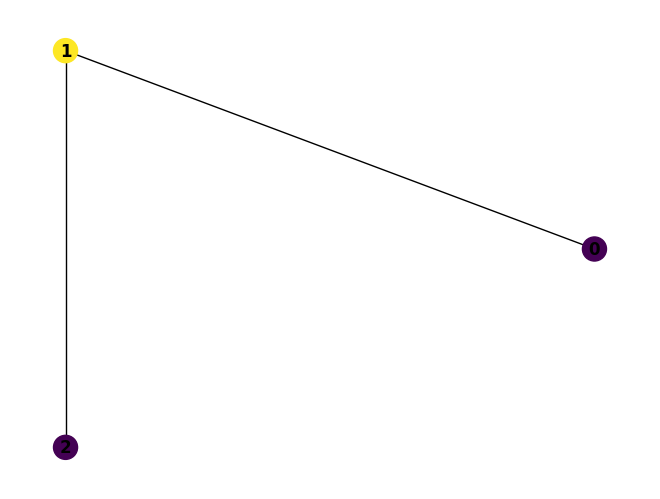


C(Qmin):  0.0
C(min):  0.0
OK CYmin == CQmin


In [8]:
# Step 16
ry = TwoLocal(qubit_op.num_qubits, "ry", "cz", reps=3, entanglement="linear")
print(TwoLocal(qubit_op.num_qubits, "ry", "cz", reps=3, insert_barriers=True, entanglement="linear").decompose())

optimizer = SPSA(maxiter=300)
vqe = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=optimizer)

# Step 17
vqe_result = vqe.compute_minimum_eigenvalue(qubit_op)

# Step 18
energy = vqe_result.eigenvalue.real
best_solution = vqe_result.best_measurement["bitstring"]
Qmin = np.asarray([int(y) for y in reversed(best_solution)])
cost = energy + cz
print("\nenergy (eigenvalue):", energy)
print("Qmin (solution) = " + str(Qmin) + " cost (energy + offset) = " + str(cost))
print("Computing time = ", vqe_result.optimizer_time)

print("\nGraph coloring solution with VQE:")
for ii in range(len(Qmin)):
  if Qmin[ii] == 1:
    print("q_%02d --> x_%d%d=true --> N%d C%d" % (ii, (ii//K), (ii%K), (ii//K), (ii%K)))
print()
draw_graph(nx.from_numpy_array(G), getColors(Qmin, N, K))

# Step 19
CQmin = (Qmin.dot(Q).dot(Qmin.transpose()))+g.dot(Qmin.transpose())+c
print("\nC(Qmin): ", CQmin)
print("C(min): ", Cmin)
if Cmin == CQmin:
  print("OK CYmin == CQmin")
else:
  print("KO QYmin != CQmin")

## Solving with the Qiskit Optimization Module

In [9]:
from qiskit_optimization import QuadraticProgram
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer

Create an intance of the quadratic program. We specify the binary variables and the component of the QUBO equation: the matrix $Q$, the vector $g$ and the constant $c$.

In [10]:
qp_model = QuadraticProgram("GraphColoring")
y = [qp_model.binary_var('y%s' % (i+1)) for i in range(N*K)]
qp_model.minimize(constant=c, linear=g, quadratic=Q)
print(qp_model.prettyprint())

print("Symmetric quadratic matrix:\n", qp_model.objective.quadratic.to_array(symmetric=True), "\n")

Problem name: GraphColoring

Minimize
  8*y1*y2 + 4*y1*y3 + 4*y2*y4 + 8*y3*y4 + 4*y3*y5 + 4*y4*y6 + 8*y5*y6 - 4*y1
  - 4*y2 - 4*y3 - 4*y4 - 4*y5 - 4*y6 + 12

Subject to
  No constraints

  Binary variables (6)
    y1 y2 y3 y4 y5 y6

Symmetric quadratic matrix:
 [[0. 4. 2. 0. 0. 0.]
 [4. 0. 0. 2. 0. 0.]
 [2. 0. 0. 4. 2. 0.]
 [0. 2. 4. 0. 0. 2.]
 [0. 0. 2. 0. 0. 4.]
 [0. 0. 0. 2. 4. 0.]] 



We generate the Ising Hamiltonian form of the QUBO model with the `to_ising` method.

In [11]:
qubitOp, offset = qp_model.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 10.0
Ising Hamiltonian:
SparsePauliOp(['IIIIIZ', 'IIIIZI', 'IIIZII', 'IIZIII', 'IZIIII', 'ZIIIII', 'IIIIZZ', 'IIIZIZ', 'IIZIZI', 'IIZZII', 'IZIZII', 'ZIZIII', 'ZZIIII'],
              coeffs=[-1.+0.j, -1.+0.j, -2.+0.j, -2.+0.j, -1.+0.j, -1.+0.j,  2.+0.j,  1.+0.j,
  1.+0.j,  2.+0.j,  1.+0.j,  1.+0.j,  2.+0.j])


Then, we can compute the exact classical solution with the `NumPyMinimumEigenSolver` from both the `QuadraticProgram` instance and from the Ising Hamiltonian computed from it. In this case, each function returns different result parameters.

In [12]:
# Solving Quadratic Program using exact classical numpy minimum eigen solver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result_from_qp_model = exact.solve(qp_model)
print(result_from_qp_model.prettyprint())

objective function value: 0.0
variable values: y1=0.0, y2=1.0, y3=1.0, y4=0.0, y5=0.0, y6=1.0
status: SUCCESS


In [13]:
result_from_hamiltonian = NumPyMinimumEigensolver().compute_minimum_eigenvalue(qubitOp)

print("energy:", result_from_hamiltonian.eigenvalue.real)
print("objective:", result_from_hamiltonian.eigenvalue.real + offset)

energy: -10.0
objective: 0.0


Finally, we compute an optimised solution using the previously defined `SamplingVQE`.

In [14]:
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp_model)
print(result.prettyprint())

objective function value: 0.0
variable values: y1=1.0, y2=0.0, y3=0.0, y4=1.0, y5=1.0, y6=0.0
status: SUCCESS


energy (eigenvalue): -9.978794766715184
Qmin (solution) = [1 0 0 1 1 0] cost (energy + offset) = 0.021205233284815606
Computing time =  3.6137895584106445
C(Qmin):  0.0
C(min):  0.0
OK CYmin == CQmin

Graph coloring solution with VQE:
q_00 --> x_00=true --> N0 C0
q_03 --> x_11=true --> N1 C1
q_04 --> x_20=true --> N2 C0




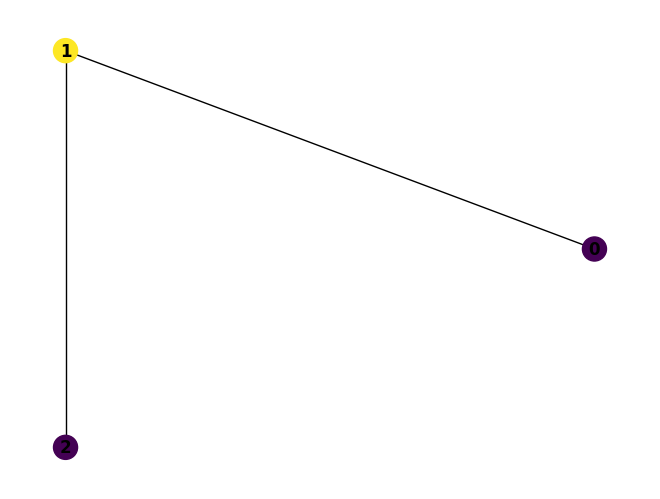

In [15]:
result = vqe.compute_minimum_eigenvalue(qubitOp)

# print results
eigvecs = vqe_result.eigenstate
energy  = vqe_result.eigenvalue.real
best_solution = vqe_result.best_measurement["bitstring"]
Qmin = np.asarray([int(y) for y in reversed(best_solution)])
cost = vqe_result.eigenvalue.real + offset
print("energy (eigenvalue):", energy)
print("Qmin (solution) = " + str(Qmin) + " cost (energy + offset) = " + str(cost))
print("Computing time = ", vqe_result.optimizer_time)

CQmin = (Qmin.dot(Q).dot(Qmin.transpose()))+g.dot(Qmin.transpose())+c
print("C(Qmin): ", CQmin)
print("C(min): ", Cmin)
if Cmin == CQmin:
  print("OK CYmin == CQmin")
else:
  print("KO QYmin != CQmin")

print("\nGraph coloring solution with VQE:")
for ii in range(len(Qmin)):
  if Qmin[ii] == 1:
    print("q_%02d --> x_%d%d=true --> N%d C%d" % (ii, (ii//K), (ii%K), (ii//K), (ii%K)))
print()
draw_graph(nx.from_numpy_array(G), getColors(Qmin, N, K))